In [1]:
%pylab inline
import pandas as pd
from IPython.display import display, HTML


Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [3]:
%time train = fastparquet.ParquetFile('../input/train_v2.parq').to_pandas()

CPU times: user 6.56 s, sys: 3.53 s, total: 10.1 s
Wall time: 10.1 s


In [4]:
train.head()

customer_id market     date  f_0 f_1  f_2       f_3       f_4  f_5  \
0  219009981584     c2  4012017    1  c0    1 -0.000086 -0.000086   21   
1  144106027184     c5  4012017    9  c1    3 -0.000068 -0.000071   18   
2  144106028273    c20  4012017    4  c1    1 -0.000054 -0.000043   13   
3  144106028504     c5  4012017    3  c1    1 -0.000075 -0.000082   20   
4  144106029824     c5  4012017    8  c1    1 -0.000063 -0.000074   20   

        f_6  ...    f_33      f_34      f_35      f_36      f_37      f_38  \
0 -0.000086  ...     c12 -0.000086 -0.000085 -0.000086 -0.000086 -0.000086   
1 -0.000086  ...     c29 -0.000086 -0.000086  0.001401 -0.000086 -0.000086   
2 -0.000086  ...     c24 -0.000086 -0.000085  0.000176 -0.000084 -0.000071   
3 -0.000086  ...      c8 -0.000086 -0.000086 -0.000010 -0.000086 -0.000086   
4 -0.000086  ...     c30 -0.000086 -0.000086  0.000006 -0.000086 -0.000086   

       f_39      f_40      f_41 target  
0 -0.000086 -0.000086 -0.000086      1  
1 -0.000086  0.000027  0.000671      4  
2 -0.000086 -0.000047  0.000149      6  
3 -0.000086 -0.000081 -0.000051      2  
4 -0.000086 -0.000064 -0.000008      5  

[5 rows x 46 columns]

In [5]:
train.shape

(5203955, 46)

In [6]:
train.customer_id.value_counts().head()

141908470801    53
137518055673    52
147408527220    52
137501057241    49
165020293799    47
Name: customer_id, dtype: int64

In [7]:
len(set(train['customer_id']))

1195191

In [8]:
train['date'].value_counts().sort_index()

1012017     420615
2012017     422329
3012017     437684
4012017     441215
5012016     464225
6012016     426306
7012016     458744
8012016     441772
9012016     431576
10012016    431927
11012016    420593
12012016    406969
Name: date, dtype: int64

In [9]:
vc=train['customer_id'].value_counts()

In [10]:
train.shape[0]/float(len(vc))

4.354078134791845

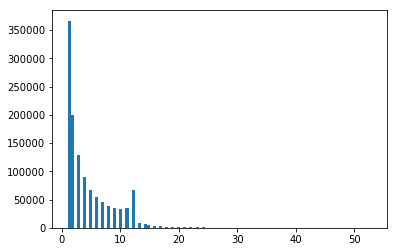

In [11]:
plt.hist(vc.values,bins=100);

In [12]:
vc=train[['customer_id','market','date']].groupby(['customer_id','market']).count()

In [13]:
train.shape[0]/float(len(vc))

2.2775028129853796

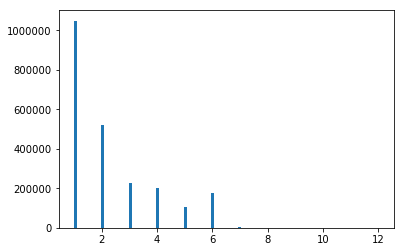

In [14]:
plt.hist(vc.values,bins=100);

In [15]:
train['market'].value_counts()

c1     578494
c0     412720
c17    405687
c5     346396
c16    278000
c4     269471
c2     265167
c3     253452
c10    231829
c11    196621
c19    183984
c20    183953
c6     171555
c18    154413
c24    148700
c12    145665
c9     143524
c23    141962
c13    140944
c14    138992
c15    102534
c21     99124
c22     74871
c8      71641
c7      64256
Name: market, dtype: int64

In [16]:
train['target'].value_counts().sort_index() 

0      62275
1     845738
2     720948
3     595514
4     474290
5     675938
6     437149
7     512782
8     281732
9     279409
10    127267
11     66303
12     70271
13     35746
14     16683
15       901
16       589
17       270
18       122
20        28
Name: target, dtype: int64

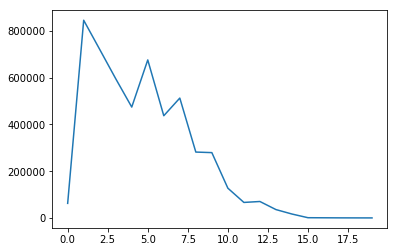

In [17]:
plt.plot(range(20),(train['target'].value_counts().sort_index().values))

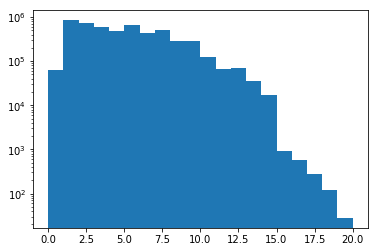

In [18]:
plt.hist(train['target'].values,bins=20,log=True);

In [19]:
vc=train[[ 'market','target']].groupby([ 'market']).mean()

In [20]:
vc.T

market        c0        c1       c10       c11       c12       c13       c14  \
target  4.658483  4.389746  4.227258  4.699895  4.641039  4.659936  5.553435   

market       c15       c16       c17    ...         c22      c23       c24  \
target  4.738487  5.310968  5.116831    ...     4.75184  4.61589  4.579966   

market        c3        c4        c5        c6        c7        c8        c9  
target  4.298688  4.753313  4.600824  4.314092  4.087867  4.558214  4.193055  

[1 rows x 25 columns]

['c0', 'c1', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c2', 'c20', 'c21', 'c22', 'c23', 'c24', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
c0


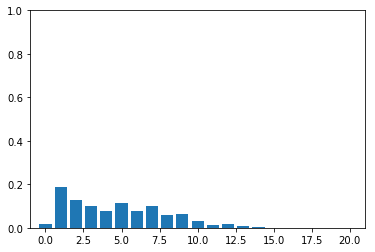

c1


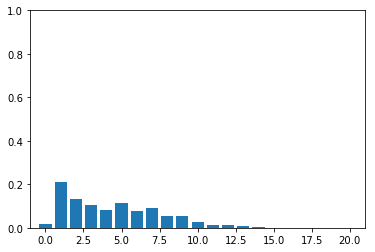

c10


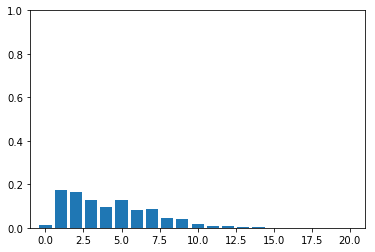

c11


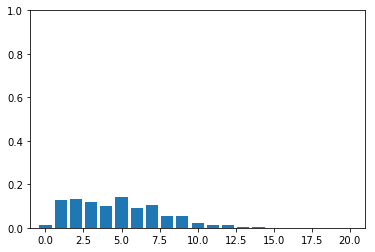

c12


c13


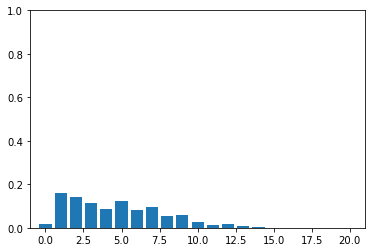

c14


c15


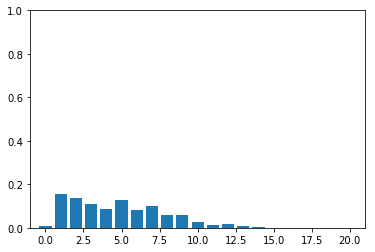

c16


c17


c18


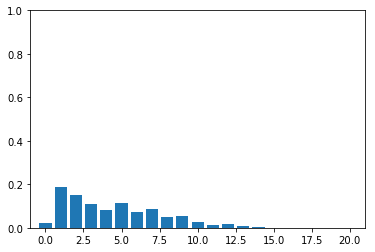

c19


c2


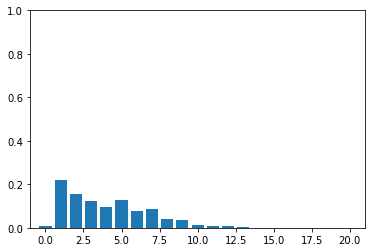

c20


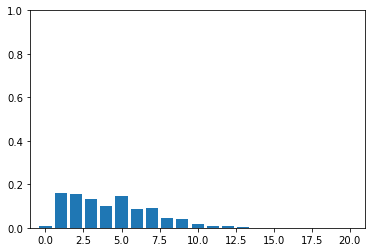

c21


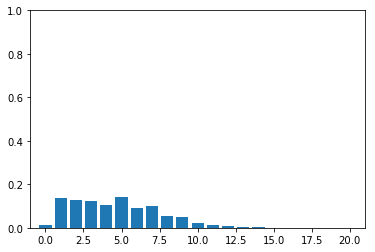

c22


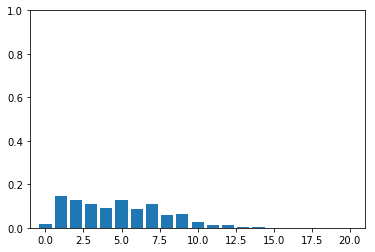

c23


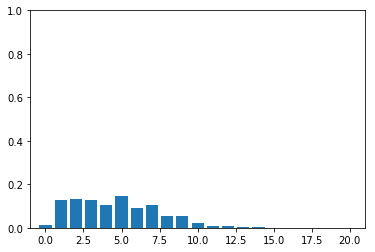

c24


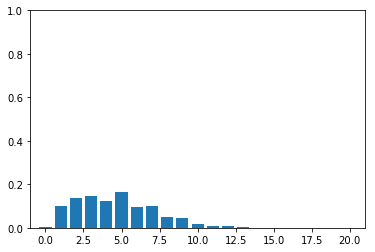

c3


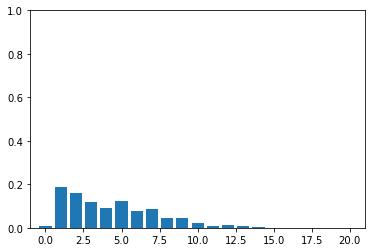

c4


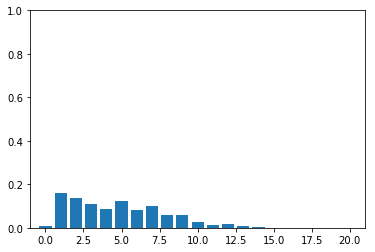

c5


c6


c7


c8


c9


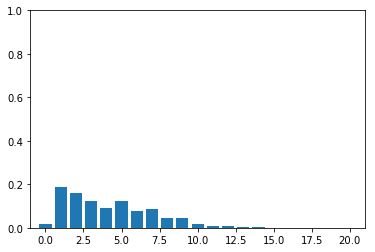

In [21]:
col='market'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1


2


3


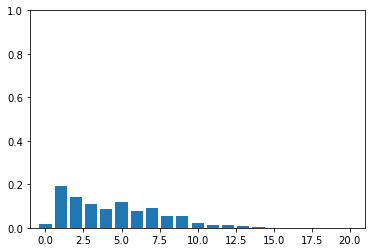

4


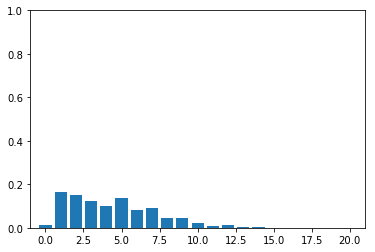

5


6


7


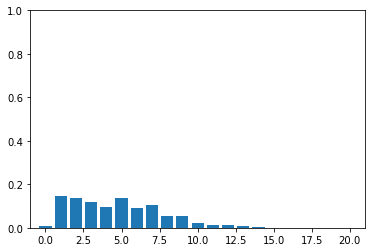

8


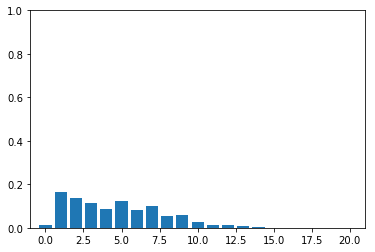

9


10


11


12


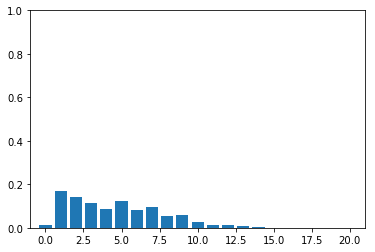

13


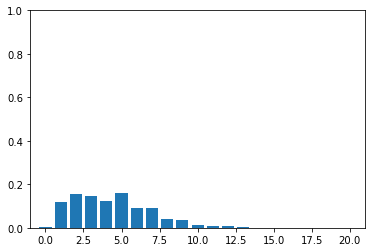

14


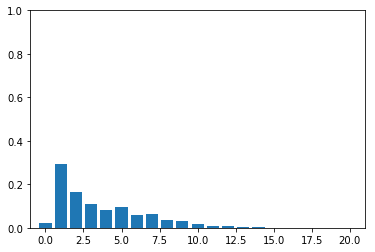

In [24]:
col='f_0'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[1, 2, 3, 4]
1


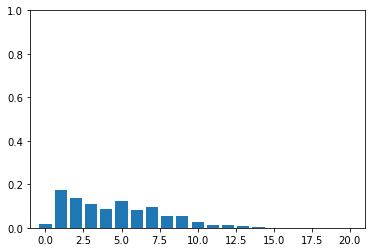

2


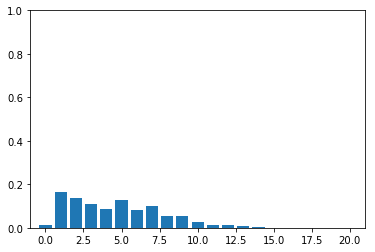

3


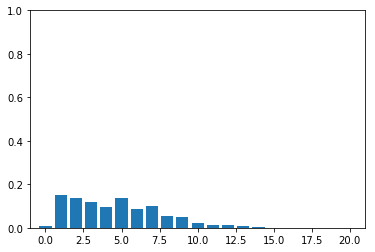

4


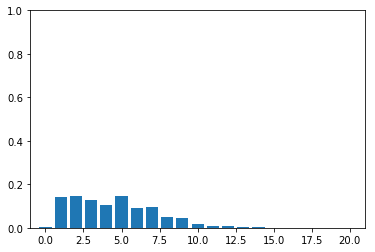

In [25]:
col='f_2'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

In [27]:
for col in train.columns:
    if col.startswith('f_'):
        if df[col].dtype=='int64':
            print col

f_0
f_2
f_5
f_7


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
1


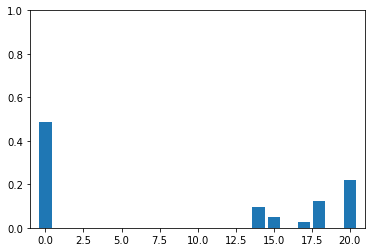

2


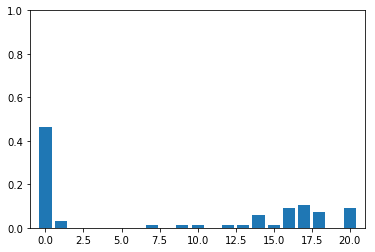

3


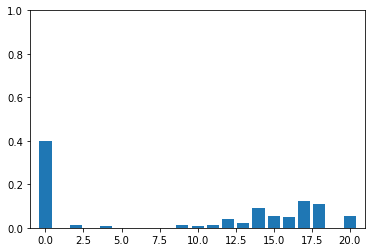

4


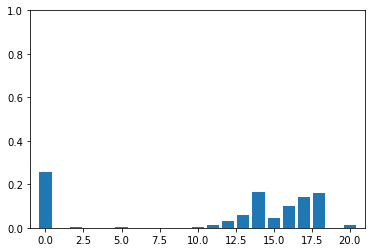

5


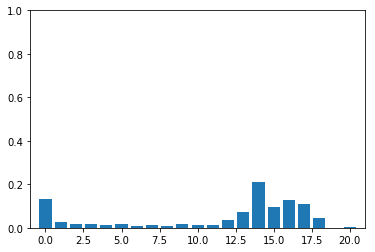

6


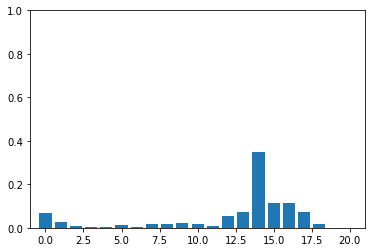

7


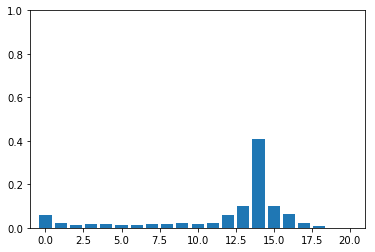

8


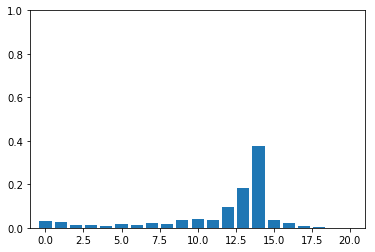

9


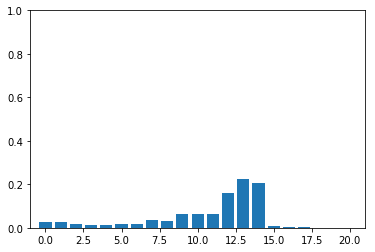

10


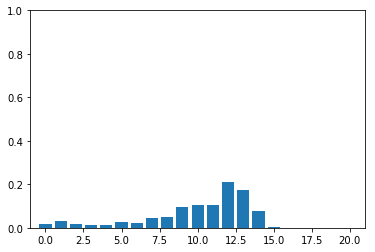

11


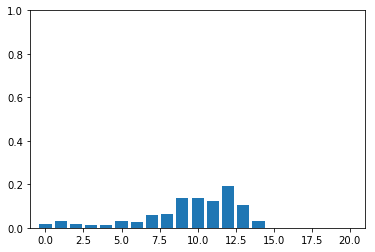

12


13


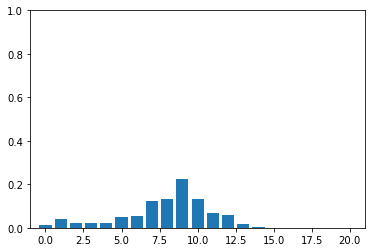

14


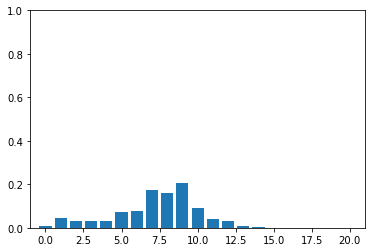

15


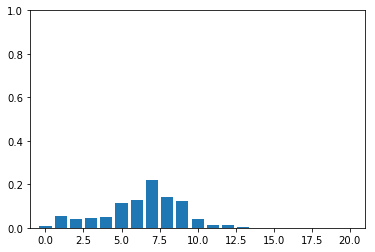

16


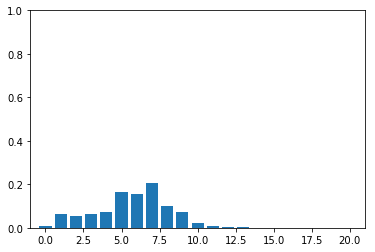

17


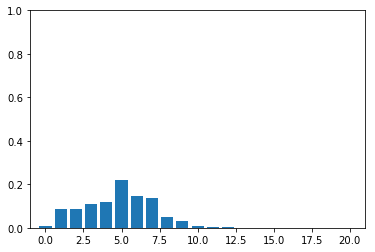

18


19


20


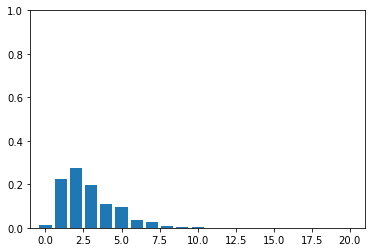

21


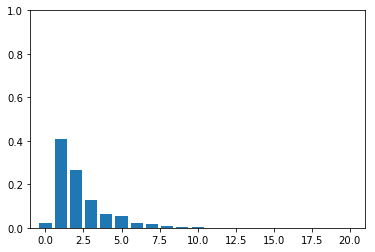

22


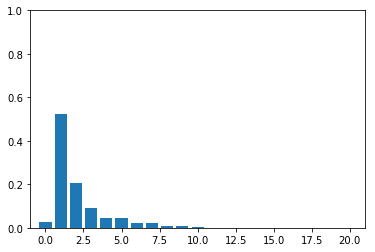

In [26]:
col='f_5'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c2']
c0


c1


c2


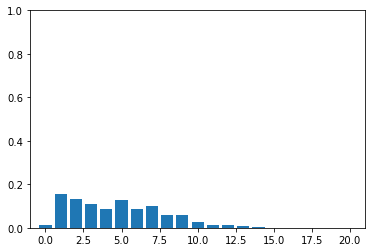

In [30]:
col='f_1'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c2']
c0


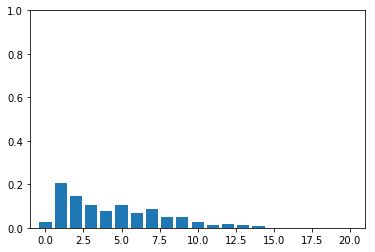

c1


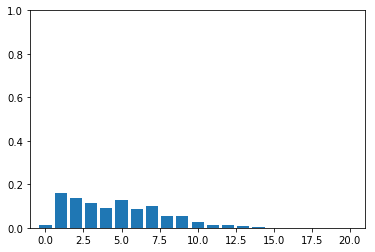

c2


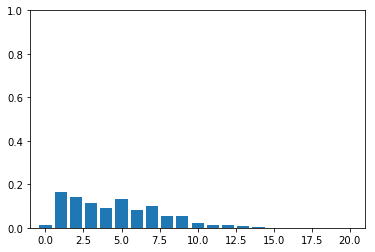

In [31]:
col='f_9'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c2', 'c3', 'c4', 'c5']
c0


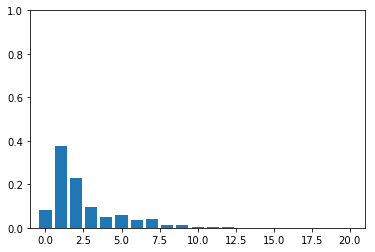

c1


c2


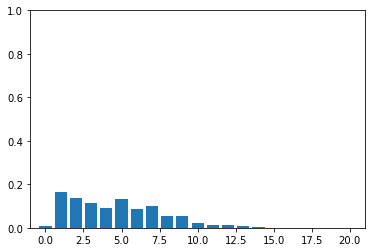

c3


c4


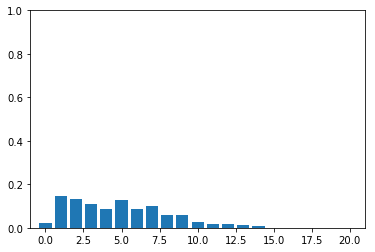

c5


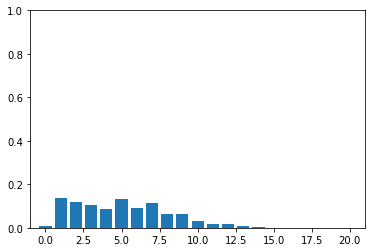

In [32]:
col='f_16'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['Train']
Train


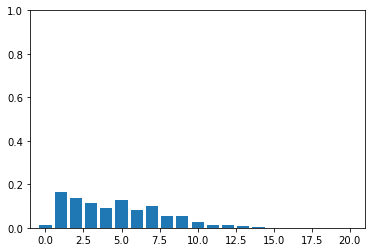

In [33]:
col='f_19'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c2', 'c3', 'c4', 'c5']
c0


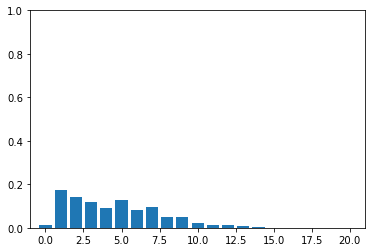

c1


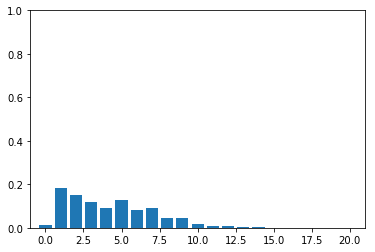

c2


c3


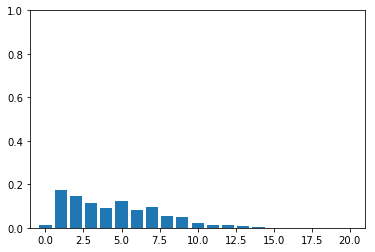

c4


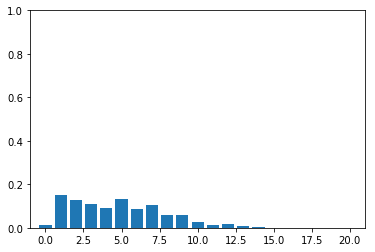

c5


In [34]:
col='f_20'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
c0


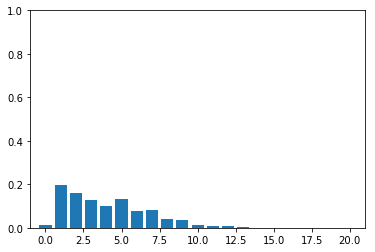

c1


c10


c11


c12


c13


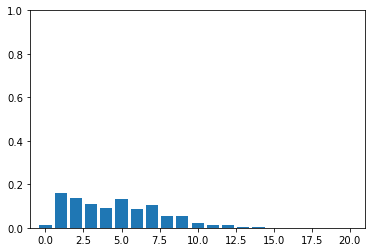

c14


c15


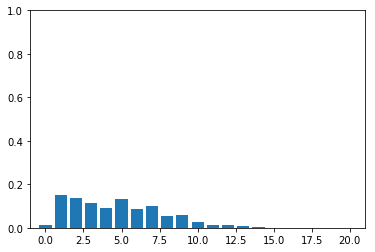

c16


c2


c3


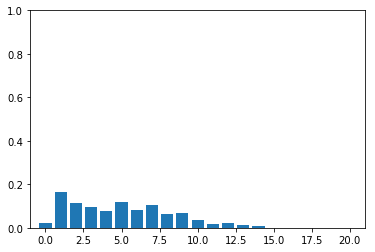

c4


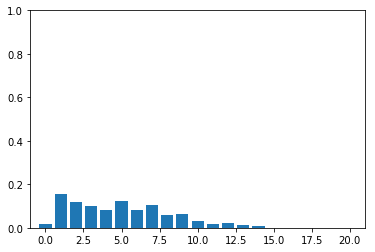

c5


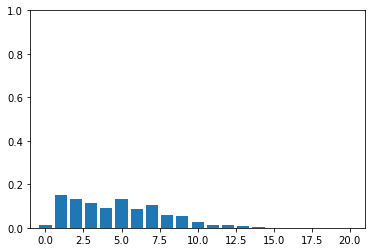

c6


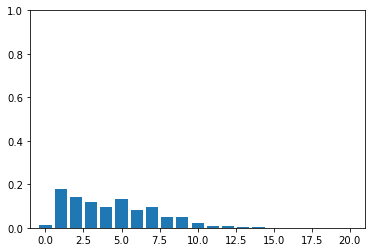

c7


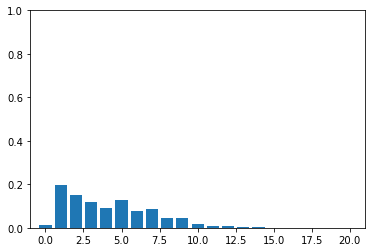

c8


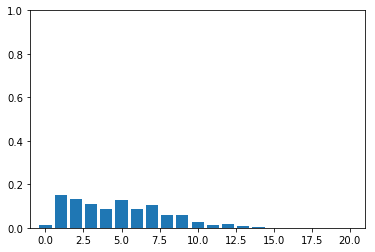

c9


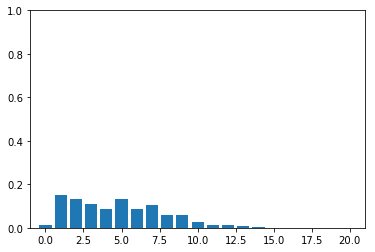

In [35]:
col='f_23'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c2', 'c3', 'c4']
c0


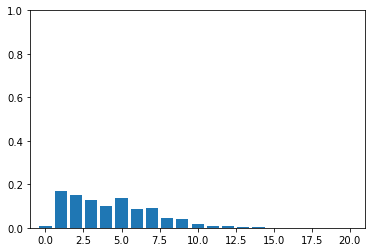

c1


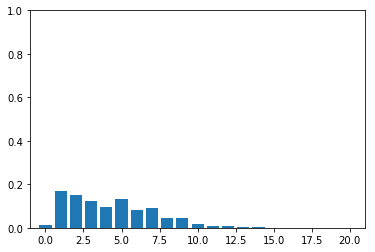

c2


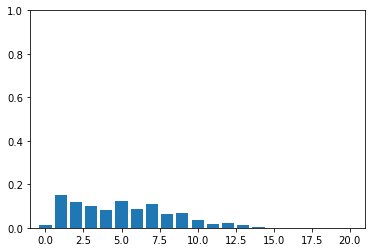

c3


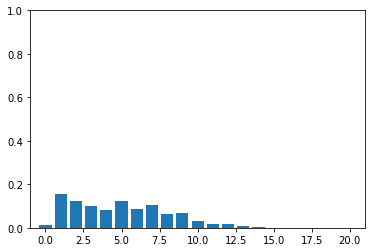

c4


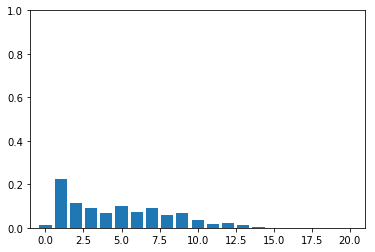

In [36]:
col='f_24'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c2', 'c3']
c0


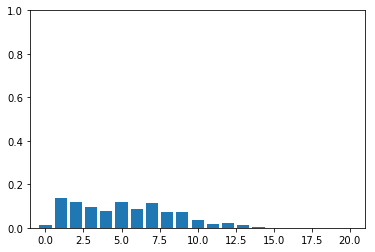

c1


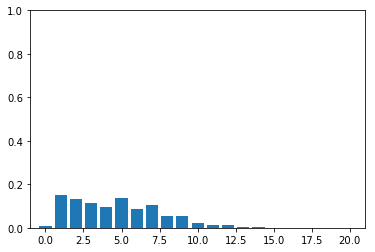

c2


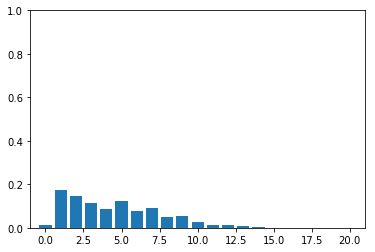

c3


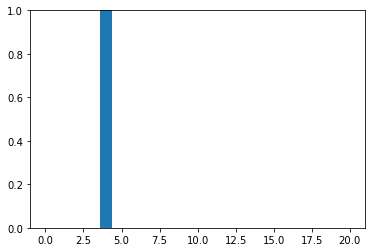

In [37]:
col='f_29'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['c0', 'c1', 'c2', 'c3', 'c4']
c0


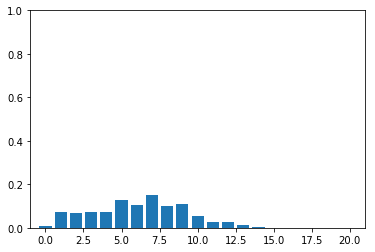

c1


c2


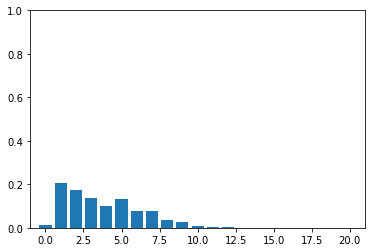

c3


c4


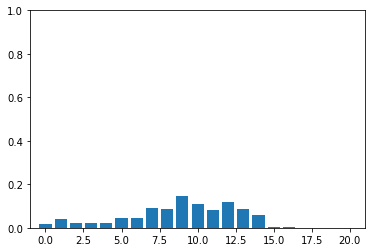

In [38]:
col='f_31'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

In [29]:
for col in train.columns:
    if col.startswith('f_') :
        if df[col].dtype=='object':
            print col

f_1
f_9
f_16
f_19
f_20
f_23
f_24
f_29
f_31
f_33


['c0', 'c1', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c2', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c3', 'c30', 'c31', 'c32', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
c0


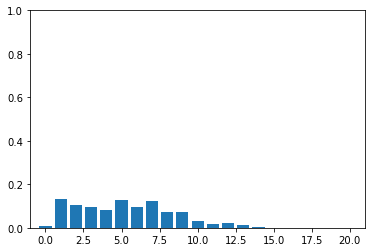

c1


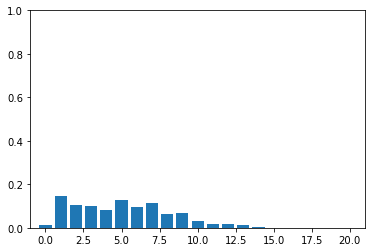

c10


c11


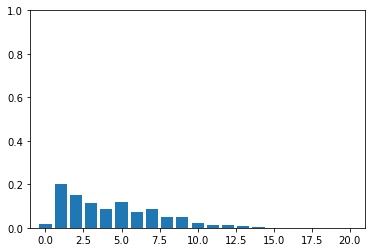

c12


c13


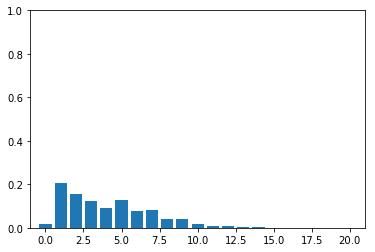

c14


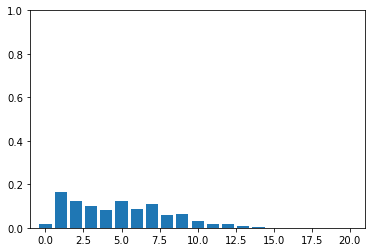

c15


c16


c17


c18


c19


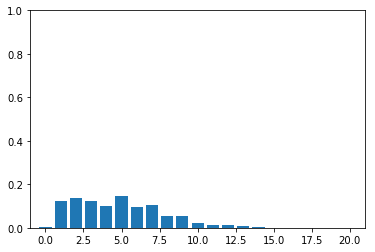

c2


c20


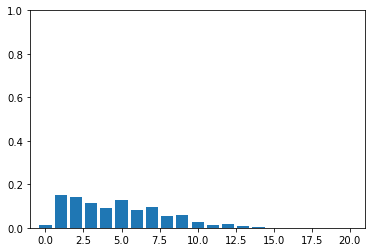

c21


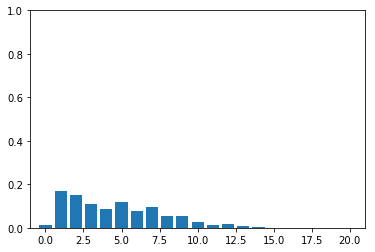

c22


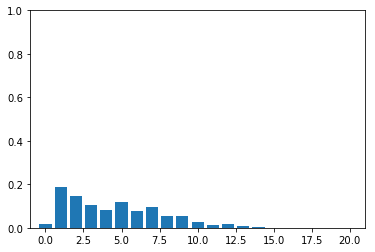

c23


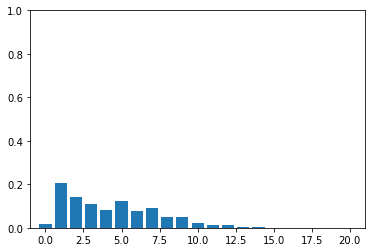

c24


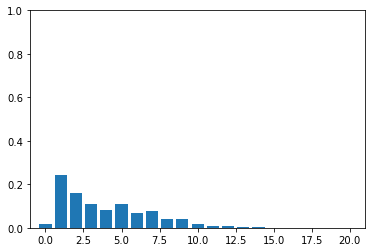

c25


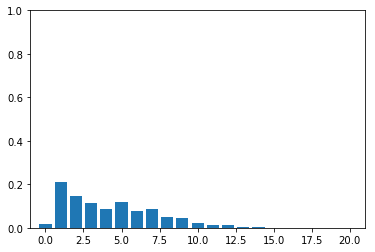

c26


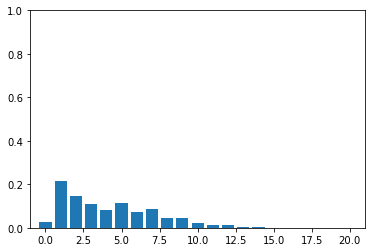

c27


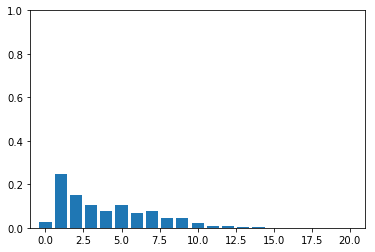

c28


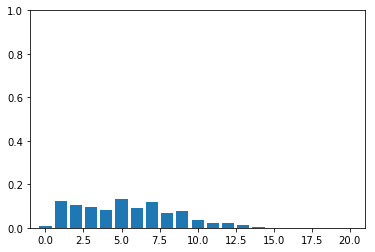

c29


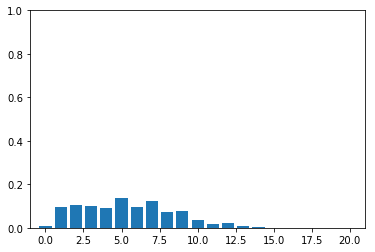

c3


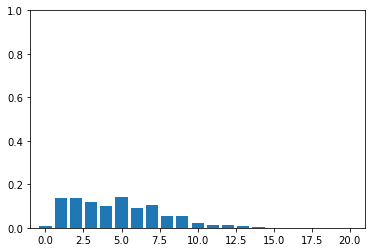

c30


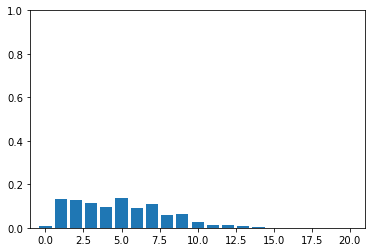

c31


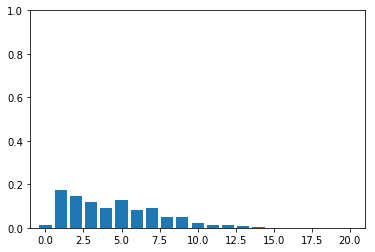

c32


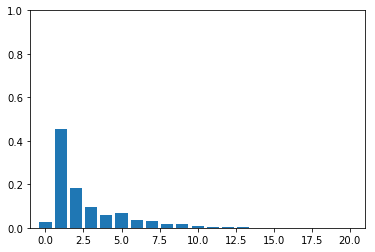

c4


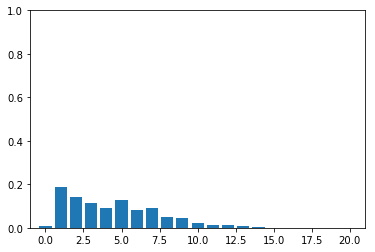

c5


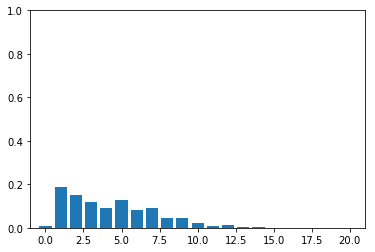

c6


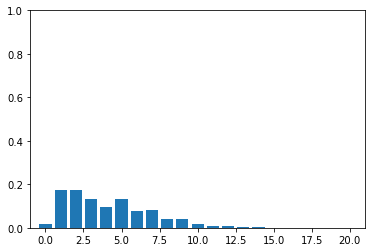

c7


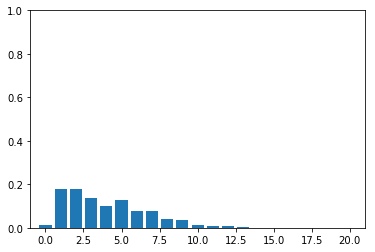

c8


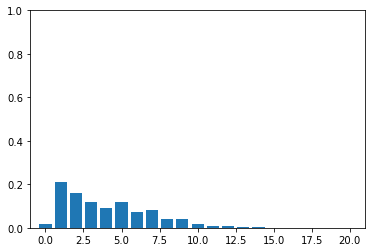

c9


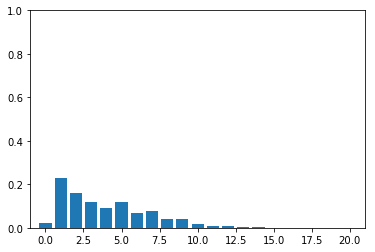

In [39]:
col='f_33'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()